In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv(r'C:\Users\omarf\Downloads\playground-series-s5e2\train.csv')

train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [189]:
test = pd.read_csv(r'C:\Users\omarf\Downloads\playground-series-s5e2\test.csv')
test.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [190]:
sample_submission = pd.read_csv(r'C:\Users\omarf\Downloads\playground-series-s5e2\sample_submission.csv')
sample_submission.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


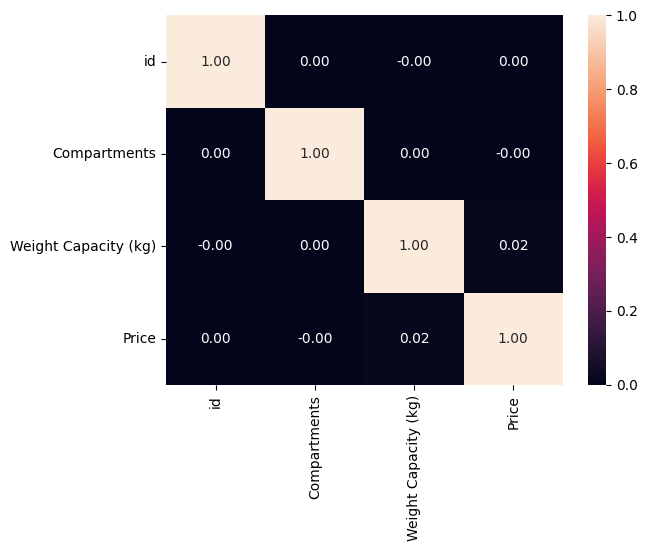

In [191]:
corr = train.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [192]:
df = pd.concat([train, test], sort=False)
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [193]:
df.isnull().sum()

id                           0
Brand                    15932
Material                 13960
Size                     10976
Compartments                 0
Laptop Compartment       12406
Waterproof               11861
Style                    13123
Color                    16735
Weight Capacity (kg)       215
Price                   200000
dtype: int64

In [194]:
df['Brand'].value_counts()

Brand
Adidas          100250
Under Armour    100131
Nike             95609
Puma             94671
Jansport         93407
Name: count, dtype: int64

In [195]:
df.isnull().sum()

id                           0
Brand                    15932
Material                 13960
Size                     10976
Compartments                 0
Laptop Compartment       12406
Waterproof               11861
Style                    13123
Color                    16735
Weight Capacity (kg)       215
Price                   200000
dtype: int64

In [196]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [197]:
df['Laptop Compartment'].value_counts()

Laptop Compartment
Yes    247001
No     240593
Name: count, dtype: int64

In [198]:
df['Waterproof'].value_counts()

Waterproof
Yes    246671
No     241468
Name: count, dtype: int64

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    500000 non-null  int64  
 1   Brand                 484068 non-null  object 
 2   Material              486040 non-null  object 
 3   Size                  489024 non-null  object 
 4   Compartments          500000 non-null  float64
 5   Laptop Compartment    487594 non-null  object 
 6   Waterproof            488139 non-null  object 
 7   Style                 486877 non-null  object 
 8   Color                 483265 non-null  object 
 9   Weight Capacity (kg)  499785 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 45.8+ MB


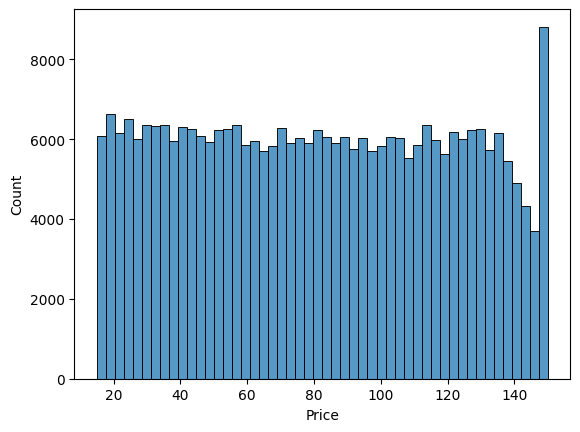

count    300000.000000
mean         81.411107
std          39.039340
min          15.000000
25%          47.384620
50%          80.956120
75%         115.018160
max         150.000000
Name: Price, dtype: float64


In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(train['Price'], bins=50)
plt.show()
print(train['Price'].describe())

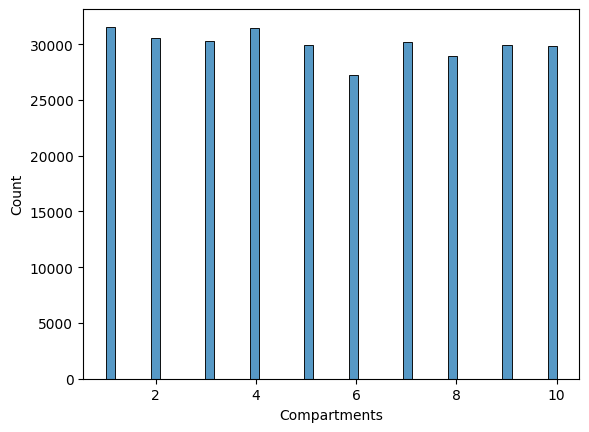

count    300000.000000
mean         81.411107
std          39.039340
min          15.000000
25%          47.384620
50%          80.956120
75%         115.018160
max         150.000000
Name: Price, dtype: float64


In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(train['Compartments'], bins=50)
plt.show()
print(train['Price'].describe())

In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])


In [203]:
df['Size'].value_counts()

Size
Medium    169681
Large     164327
Small     155016
Name: count, dtype: int64

In [204]:
df['Material'].value_counts()

Material
Polyester    132657
Leather      122405
Nylon        118096
Canvas       112882
Name: count, dtype: int64

In [205]:
# One-Hot Encoding categorical variables
df = pd.get_dummies(df, columns=['Brand', 'Material', 'Size', 'Style', 'Color', 'Laptop Compartment', 'Waterproof'], drop_first=True)


df.head()

,id,Compartments,Weight Capacity (kg),Price,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Material_Leather,Material_Nylon,Material_Polyester,Size_Medium,Size_Small,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Laptop Compartment_Yes,Waterproof_Yes
0,0,7.0,11.611723,112.15875,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False
1,1,10.0,27.078537,68.88056,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,True
2,2,2.0,16.643760,39.17320,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False
3,3,8.0,12.937220,80.60793,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False
4,4,1.0,17.749338,86.02312,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,True


In [206]:
print(df['Price'].mean())

81.41110683033334


In [207]:
df.drop(columns = 'Weight Capacity (kg)', inplace=True)
df.head()

,id,Compartments,Price,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Material_Leather,Material_Nylon,Material_Polyester,Size_Medium,Size_Small,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Laptop Compartment_Yes,Waterproof_Yes
0,0,7.0,112.15875,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False
1,1,10.0,68.88056,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,True
2,2,2.0,39.17320,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False
3,3,8.0,80.60793,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False
4,4,1.0,86.02312,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,True


In [208]:
df.filter(like='Color_').sum().sort_values(ascending=False)

Color_Pink     86451
Color_Gray     83514
Color_Blue     80109
Color_Red      78620
Color_Green    77200
dtype: int64

In [209]:
df.isnull().sum()

id                             0
Compartments                   0
Price                     200000
Brand_1                        0
Brand_2                        0
Brand_3                        0
Brand_4                        0
Brand_5                        0
Material_Leather               0
Material_Nylon                 0
Material_Polyester             0
Size_Medium                    0
Size_Small                     0
Style_Messenger                0
Style_Tote                     0
Color_Blue                     0
Color_Gray                     0
Color_Green                    0
Color_Pink                     0
Color_Red                      0
Laptop Compartment_Yes         0
Waterproof_Yes                 0
dtype: int64

In [210]:
df.head()

,id,Compartments,Price,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Material_Leather,Material_Nylon,Material_Polyester,Size_Medium,Size_Small,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Laptop Compartment_Yes,Waterproof_Yes
0,0,7.0,112.15875,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False
1,1,10.0,68.88056,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,True
2,2,2.0,39.17320,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False
3,3,8.0,80.60793,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False
4,4,1.0,86.02312,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,True


In [211]:
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [212]:
X = train.drop(columns = 'Price')
y = train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model_1 = XGBRegressor()
model_2 = DecisionTreeClassifier()
model_3 = LinearRegression()
model_4 = XGBRFClassifier()
model_5 = LGBMRegressor()

In [213]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [214]:
q1, q3 = train['Price'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("Lower bound:", lower_bound, "Upper bound:", upper_bound)

# Count outliers
outliers = train[(train['Price'] < lower_bound) | (train['Price'] > upper_bound)]
print("Number of outliers:", len(outliers))

# Clean the data (optional, if outliers are few)
train_clean = train[(train['Price'] >= lower_bound) & (train['Price'] <= upper_bound)]
X_train_clean = train_clean.drop(columns=['Price'])
y_train_clean = train_clean['Price']

Lower bound: -54.065690000000004 Upper bound: 216.46847
Number of outliers: 0


In [215]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Split into training (80%) and validation (20%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [216]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # For square root calculation

# Assuming df is your DataFrame
# Define features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Drop rows with NaN values in target variable y
X = X[~y.isna()]
y = y.dropna()

# Split into training (80%) and validation (20%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_valid, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 1515.6455917225178
Root Mean Squared Error (RMSE): 38.93129321924097
R-squared (R²): 0.0006398181063030917
Coefficients: [ 1.51502707e-06  1.98959896e-03  1.25026596e+00  7.13362698e-01
  9.65350865e-01  1.33616341e+00  3.36418201e-01 -1.64880010e+00
 -1.06243793e+00 -1.03979999e-01 -1.31712925e-01 -8.88891835e-03
 -5.69762478e-02 -7.64989244e-02  1.26922311e+00  2.77381485e-01
  1.66988406e+00  9.27347877e-01  2.44837356e-01  9.45890119e-02
  2.90648853e-02]
Intercept: 80.3837173447244


In [217]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

# Convert 'Weight Capacity (kg)' column to numeric and handle non-numeric values

# Drop rows with NaN values in y_train and y_valid
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()
X_valid = X_valid[~y_valid.isna()]
y_valid = y_valid.dropna()

model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

print("RMSE:", root_mean_squared_error(y_valid, y_pred))


RMSE: 39.04088115542927


In [218]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Create an instance of the LGBMRegressor model
lgb_model = LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lgb = lgb_model.predict(X_valid)

# Evaluate the model
mse_lgb = mean_squared_error(y_valid, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)  # Calculate RMSE by taking the square root of MSE

# Print the results
print("Mean Squared Error (MSE):", mse_lgb)
print("Root Mean Squared Error (RMSE):", rmse_lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 21
[LightGBM] [Info] Start training from score 81.448481
Mean Squared Error (MSE): 1519.3486828953517
Root Mean Squared Error (RMSE): 38.97882351861523
